# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | valparaiso
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | sheridan
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | kurumul
City not found. Skipping...
Processing Record 8 of Set 1 | vorgashor
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | kilindoni
Processing Record 11 of Set 1 | kingston
Processing Record 12 of Set 1 | puerto aysen
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | sumter
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | christchurch
Processing Record 17 of Set 1 | ad dawadimi
Processing Record 18 of Set 1 | puerto baquerizo moreno
Processing Record 19 of Set 1 | brandon
Processing Record 20 of Set 1 | whitehorse
Process

Processing Record 42 of Set 4 | yakeshi
Processing Record 43 of Set 4 | juneau
Processing Record 44 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 45 of Set 4 | galappo
Processing Record 46 of Set 4 | piney green
Processing Record 47 of Set 4 | port douglas
Processing Record 48 of Set 4 | whakatane
Processing Record 49 of Set 4 | guelmim
Processing Record 0 of Set 5 | alofi
Processing Record 1 of Set 5 | champerico
Processing Record 2 of Set 5 | mandalgovi
Processing Record 3 of Set 5 | greymouth
Processing Record 4 of Set 5 | vimmerby
Processing Record 5 of Set 5 | okanagan
Processing Record 6 of Set 5 | flying fish cove
Processing Record 7 of Set 5 | fada
Processing Record 8 of Set 5 | cururupu
Processing Record 9 of Set 5 | la passe
Processing Record 10 of Set 5 | longyearbyen
Processing Record 11 of Set 5 | kita
Processing Record 12 of Set 5 | haiku-pauwela
Processing Record 13 of Set 5 | franklin
Processing Record 14 of Set 5 | ofunato
Processing Record 15 of Set

Processing Record 37 of Set 8 | ujae
Processing Record 38 of Set 8 | vadso
Processing Record 39 of Set 8 | i-n-salah
Processing Record 40 of Set 8 | karaton
Processing Record 41 of Set 8 | port saint john's
Processing Record 42 of Set 8 | bracebridge
Processing Record 43 of Set 8 | ondjiva
Processing Record 44 of Set 8 | santa ana
Processing Record 45 of Set 8 | vigan
Processing Record 46 of Set 8 | howrah
Processing Record 47 of Set 8 | turpan
Processing Record 48 of Set 8 | mount pearl
Processing Record 49 of Set 8 | betio village
Processing Record 0 of Set 9 | kill devil hills
Processing Record 1 of Set 9 | mukalla
Processing Record 2 of Set 9 | bakanas
Processing Record 3 of Set 9 | tomatlan
Processing Record 4 of Set 9 | karratha
Processing Record 5 of Set 9 | general pico
Processing Record 6 of Set 9 | nar'yan-mar
Processing Record 7 of Set 9 | san patricio
Processing Record 8 of Set 9 | kurakhovo
Processing Record 9 of Set 9 | pingzhuang
Processing Record 10 of Set 9 | bhimunipa

Processing Record 26 of Set 12 | ilha de mocambique
Processing Record 27 of Set 12 | flin flon
Processing Record 28 of Set 12 | nuuk
Processing Record 29 of Set 12 | cajamarca
Processing Record 30 of Set 12 | tondon
-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,25.40,53,32,0.89,US,1696279470
1,valparaiso,-33.0393,-71.6273,17.80,65,40,5.66,CL,1696279499
2,avarua,-21.2078,-159.7750,22.03,73,75,4.12,CK,1696279442
3,edinburgh of the seven seas,-37.0676,-12.3116,9.82,55,38,9.67,SH,1696279482
4,sheridan,44.8333,-106.9173,18.51,71,40,1.54,US,1696279500


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,25.40,53,32,0.89,US,1696279470
1,valparaiso,-33.0393,-71.6273,17.80,65,40,5.66,CL,1696279499
2,avarua,-21.2078,-159.7750,22.03,73,75,4.12,CK,1696279442
3,edinburgh of the seven seas,-37.0676,-12.3116,9.82,55,38,9.67,SH,1696279482
4,sheridan,44.8333,-106.9173,18.51,71,40,1.54,US,1696279500


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

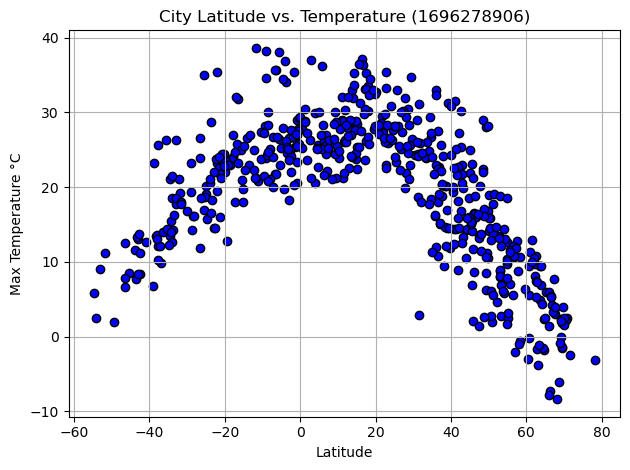

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

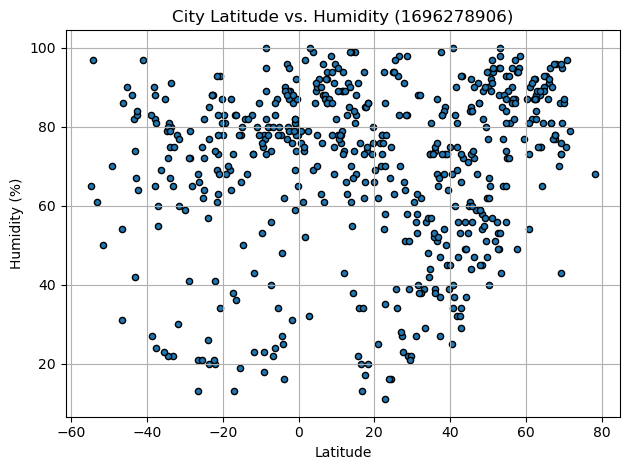

In [28]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

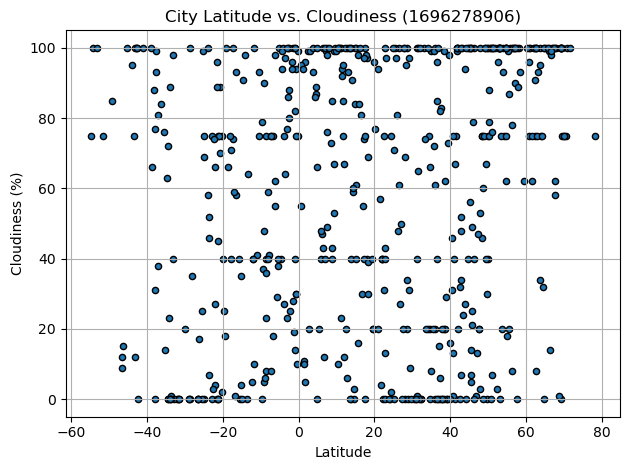

In [29]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

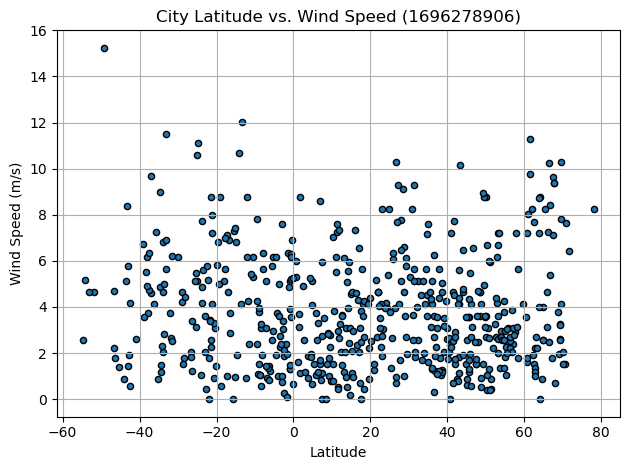

In [30]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship




Linear equation: y = -0.44x + 34.56
The r-value is: -0.8277584775024149


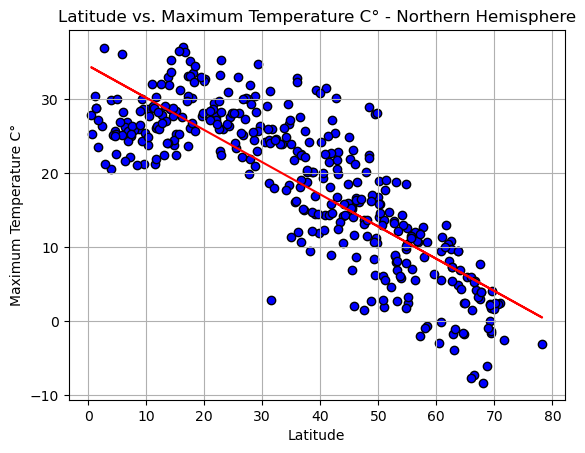

In [37]:
#Define northern_hemi_df
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")


# Define a function to create Linear Regression plots

def lr_funcV2(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"output_data/LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,25.40,53,32,0.89,US,1696279470
4,sheridan,44.8333,-106.9173,18.51,71,40,1.54,US,1696279500
6,vorgashor,67.5833,63.9500,2.97,77,100,9.64,RU,1696279500
7,hawaiian paradise park,19.5933,-154.9731,27.72,80,20,0.89,US,1696279500
9,kingston,17.9970,-76.7936,33.53,74,40,4.12,JM,1696278906


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,valparaiso,-33.0393,-71.6273,17.80,65,40,5.66,CL,1696279499
2,avarua,-21.2078,-159.7750,22.03,73,75,4.12,CK,1696279442
3,edinburgh of the seven seas,-37.0676,-12.3116,9.82,55,38,9.67,SH,1696279482
5,grytviken,-54.2811,-36.5092,2.44,97,100,5.16,GS,1696279500
8,kilindoni,-7.9139,39.6668,25.12,80,41,6.33,TZ,1696279500


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.44x + 34.56
The r-value is: -0.8277584775024149


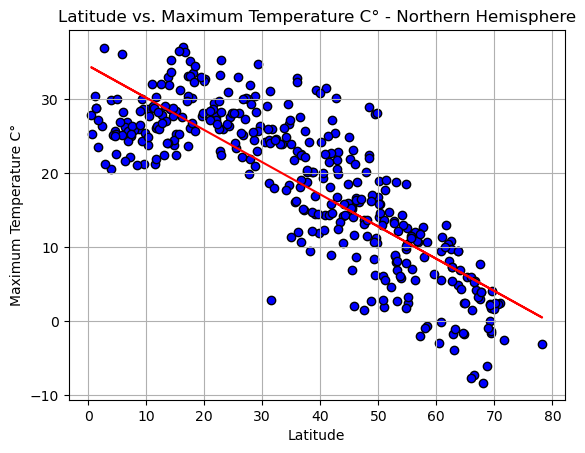

In [41]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")

# Define a function to create Linear Regression plots
def lr_funcV2(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"output_data/LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.38x + 28.98
The r-value is: 0.7558615222473428


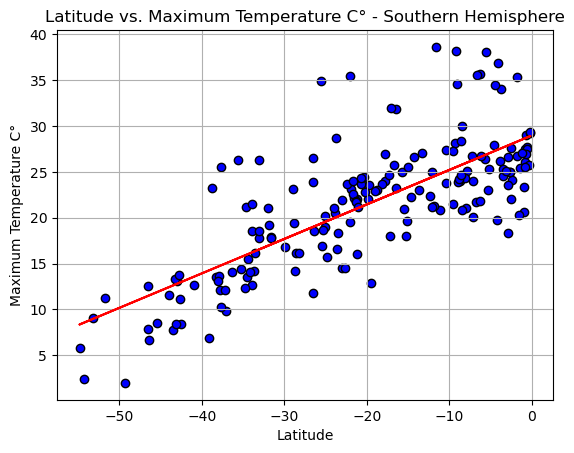

In [42]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** 

There is a relationship between proixmity to the equator and maximum temperature. The closer to the equator a location is, the more likely it is to have a higher maximum temperature in proportion to their proximity. 

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = 0.1x + 67.4
The r-value is: 0.09594108447834149


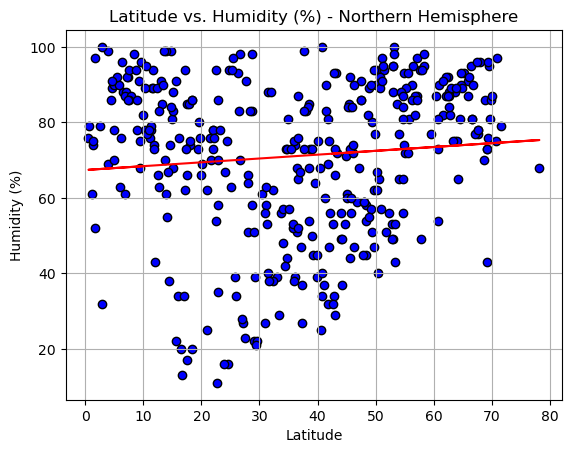

In [43]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.12x + 69.84
The r-value is: 0.07665457447858666


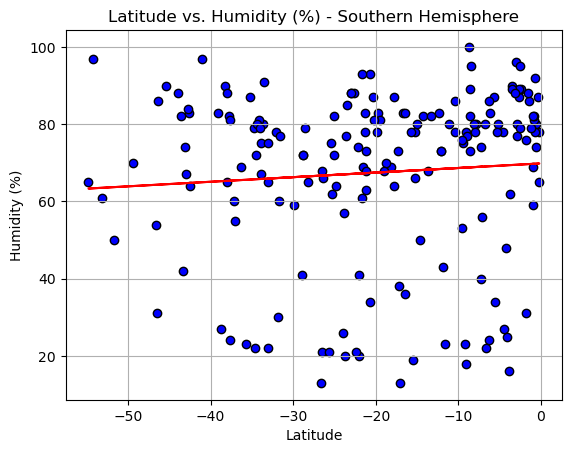

In [44]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** 

There is very little correlation between latitude and humidity. It appears there's a slight positive correlation, but it is so slight it's vitrually insignificant. 

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = 0.27x + 51.65
The r-value is: 0.13989869776759986


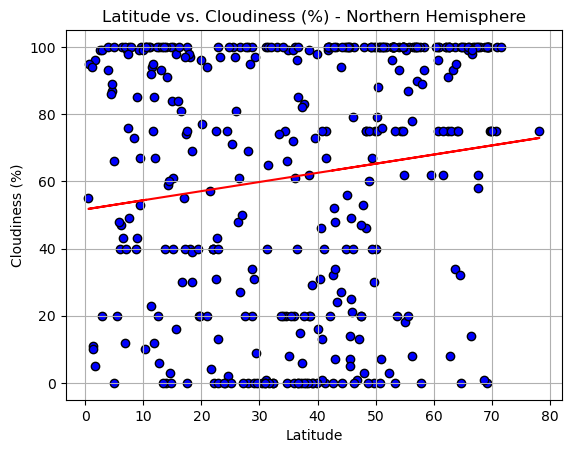

In [45]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.17x + 54.79
The r-value is: 0.0674181540580794


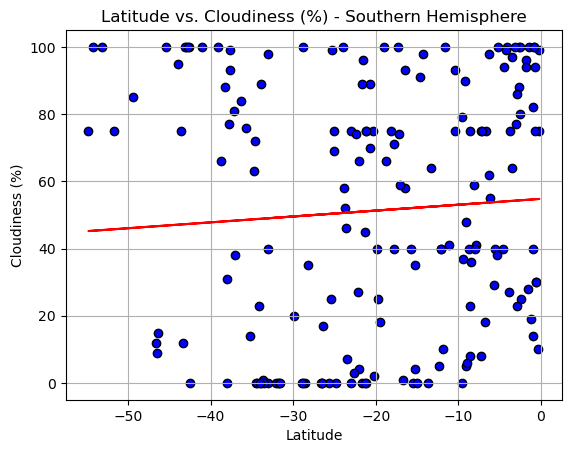

In [46]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** 

There is not much of a linear relationship that is apparent based on this data. The dots on the scatter plot are very evenly spread out, so I couldn't confidently say there is any relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = 0.02x + 3.02
The r-value is: 0.1392138083718884


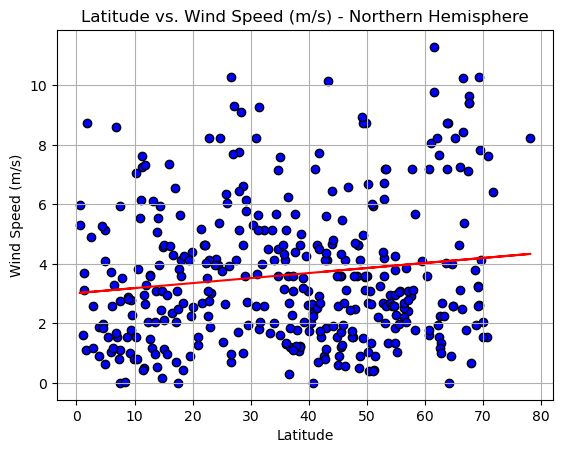

In [47]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.03x + 3.48
The r-value is: -0.16362695143924405


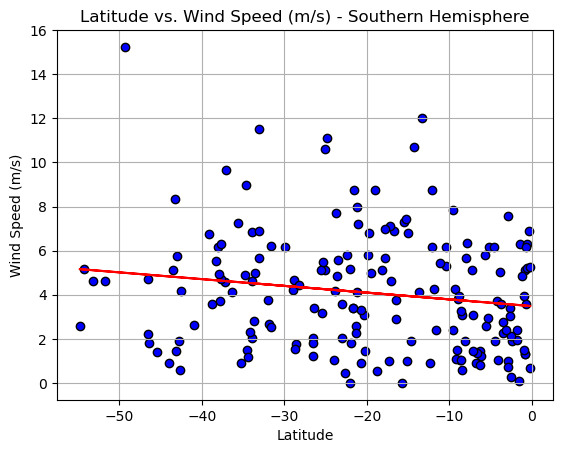

In [48]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:**

The data suggests that there is a very slightly positive correlation in the northern sempisphere. However, there was a similar negative correlation found in the southern hemisphere when it comes to latititude compared to wind speed.